#Setting Up Environment

In [19]:
import pandas as pd


file = ('/content/walmart.csv')

df = pd.read_csv(file)


# We have columns and indexes (0,1,2,3..)

In [20]:
df = df.rename(columns= {'User_ID': 'UserID',
                    'Product_ID': 'ProductID',


                    'City_Category': 'City',
       'Stay_In_Current_City_Years': 'YearsOfResidence',
                    'Marital_Status':'MaritalStatus',
                    'Product_Category': 'ProductCategory',
                    'Purchase': 'ReceiptSum'})

Only scaling Receipt sum - as product category is a categorical variable

While one-hot encoding productCategory makes sense for Elbow Method and Silhouette Score # cluster determination - it results in banded plotting. Taking away from the ability to interpret clear cluster.

The solution for this would be pca - though the purpose of this block is analyze KMeans without PCA - t.f. running into a main problem.

One potential route would be to just analyze the data without encoding, though the results would be weighted based on productcategory number vs Receipt sum, providing fuzziness in the output

# Elbow Method

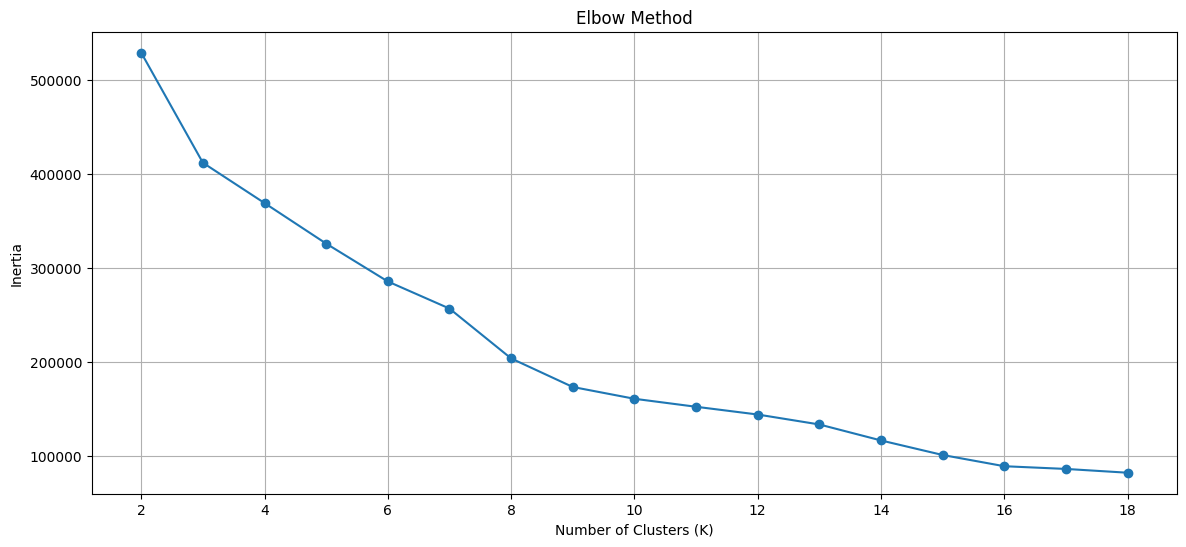

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt


Vars = df[['ReceiptSum', 'ProductCategory']]

#encode
OneHot = pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory')


# Scale
scaler = StandardScaler()
scaledRecieptSum = scaler.fit_transform(Vars[['ReceiptSum']])

# Combine scaled numeric with unscaled one-hot
Hotvars = pd.concat([pd.DataFrame(scaledRecieptSum, columns=['ReceiptSum'], index=Vars.index),OneHot], axis=1)

# final data
scaledData = Hotvars.values
dataframeScaled = pd.DataFrame(scaledData, index=df.index, columns=Hotvars.columns)

# Elbow Method
maxK = 18
inertia = []
k_values = range(2, maxK+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit(scaledData)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))
plt.plot(k_values, inertia, marker='o')
#plt.axvline(x=3, color='orange', linestyle='--', label='K = 3')
#plt.axvline(x=4, color='cyan', linestyle='--', label='K = 4')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)

plt.show()

# Silhouette Score

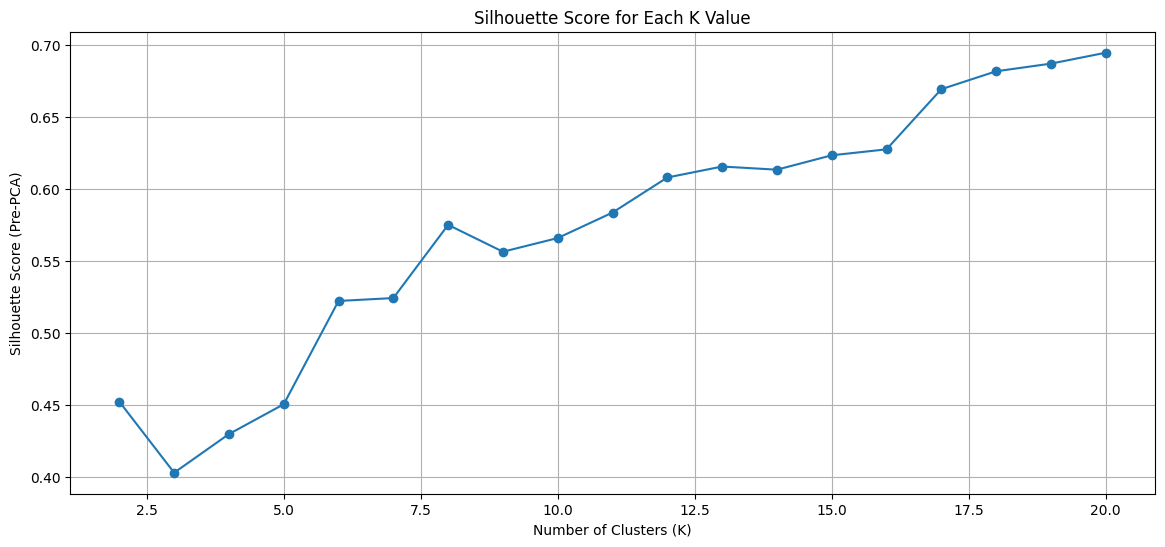

In [21]:
#Lets check the Silhouette Score  the degree to which you have a shadow - lower shadow is worse

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import  StandardScaler, MinMaxScaler
import pandas as pd
from matplotlib import pyplot as plt


minidf = df.sample(frac = .01, random_state =42 )


#sampled to reduce runtim
Vars = minidf[['ReceiptSum', 'ProductCategory']]

#encode
OneHot = pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory')


# Scale
scaler = StandardScaler()
scaledRecieptSum = scaler.fit_transform(Vars[['ReceiptSum']])

# Combine scaled numeric with unscaled one-hot
Hotvars = pd.concat([pd.DataFrame(scaledRecieptSum, columns=['ReceiptSum'], index=Vars.index),OneHot], axis=1)

# final data
scaledData = Hotvars.values
dataframeScaled = pd.DataFrame(scaledData, index=minidf.index, columns=Hotvars.columns)

# Elbow Method
maxK =20
inertia = []
silhouettelist = []

k_values = range(2, maxK+1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=200)

    clusterlabel= kmeans.fit_predict(scaledData)

    silhouettescore = silhouette_score(scaledData, clusterlabel)
    silhouettelist.append(silhouettescore)

    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14, 6))
plt.plot(k_values, silhouettelist, marker='o')
#plt.axvline(x=3, color='orange', linestyle='--', label='K = 3')
#plt.axvline(x=4, color='cyan', linestyle='--', label='K = 4')
plt.title("Silhouette Score for Each K Value")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score (Pre-PCA)")
plt.grid(True)
plt.show()


In [6]:
"""from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt


Vars = df[['ReceiptSum', 'ProductCategory']]

#encode
OneHot = pd.get_dummies(Vars['ProductCategory'], prefix='ProductCategory')


# Scale
scaler = StandardScaler()
scaledRecieptSum = scaler.fit_transform(Vars[['ReceiptSum']])

# Combine scaled numeric with unscaled one-hot
Hotvars = pd.concat([pd.DataFrame(scaledRecieptSum, columns=['ReceiptSum'], index=Vars.index),OneHot], axis=1)

# final data
scaledData = Hotvars.values
dataframeScaled = pd.DataFrame(scaledData, index=df.index, columns=Hotvars.columns)
"""

## KMeans with Elbow Method Result

In [7]:
# Run Kmeans K = 8

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=42)
cluster_assignments_k3 = kmeans.fit_predict(scaledData)


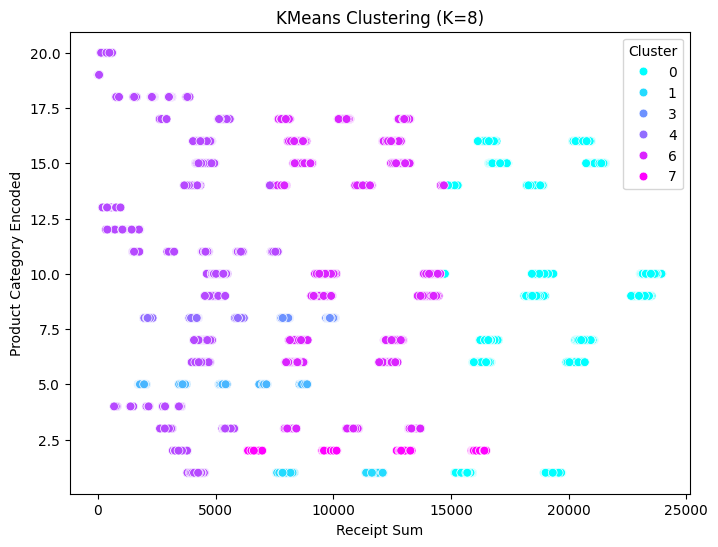

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

KmeansElbowDf = df[['ReceiptSum', 'ProductCategory']].copy() # could use Hotvars.copy() but will need to select best encoded product category
# for now we'll view the un-encoded product category and unscaled receipt sum

  ########## Main issue here is that I'm going to view one-hot data - thinking about right approach on how to visualize


KmeansElbowDf['Cluster'] = cluster_assignments_k3  # Add the cluster labels as a new column
#k3centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='ReceiptSum',  y='ProductCategory', hue='Cluster', data=KmeansElbowDf, palette='cool', s=40 )

#plt.scatter(  k3centroids[:, 0],k3centroids[:, 1],c='black',marker='*', s=250,edgecolor='white', label='Centroid',
#    zorder=2
#)  # one-hot encoding throws off centroids - best to remove

plt.title("KMeans Clustering (K=8)")
plt.xlabel("Receipt Sum")
plt.ylabel("Product Category Encoded")


#plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()


In [9]:
# Run Kmeans K =12


from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=12, random_state=42)
cluster_assignments_k10 = kmeans.fit_predict(scaledData)

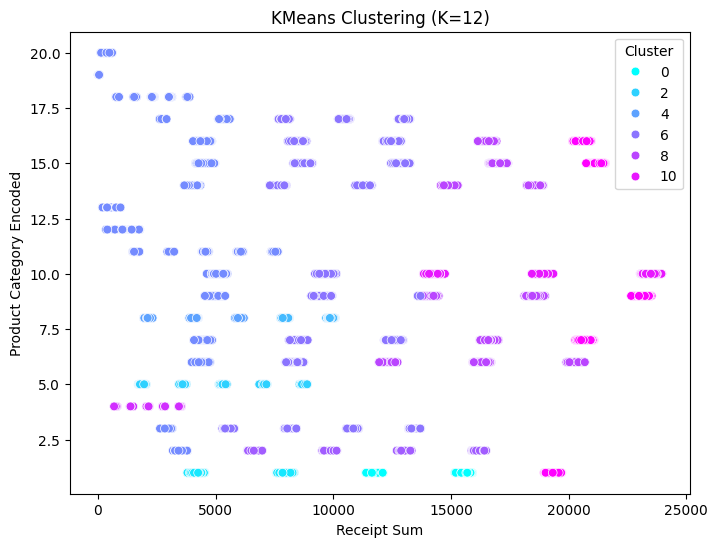

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



KmeansElbowDf = df[['ReceiptSum', 'ProductCategory']].copy() # copy to avoid changing data

KmeansElbowDf['Cluster'] = cluster_assignments_k10  # Add the cluster labels as a new column
#k10centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='ReceiptSum',  y='ProductCategory', hue='Cluster', data=KmeansElbowDf, palette='cool', s=40 )


plt.title("KMeans Clustering (K=12)")
plt.xlabel("Receipt Sum")
plt.ylabel("Product Category Encoded")


#plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()



## Kmeans with Silhouette Score

In [11]:
# Run Kmeans K = 3 with Silhouette Score

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15, random_state=42)
cluster_assignments_k14 = kmeans.fit_predict(scaledData)


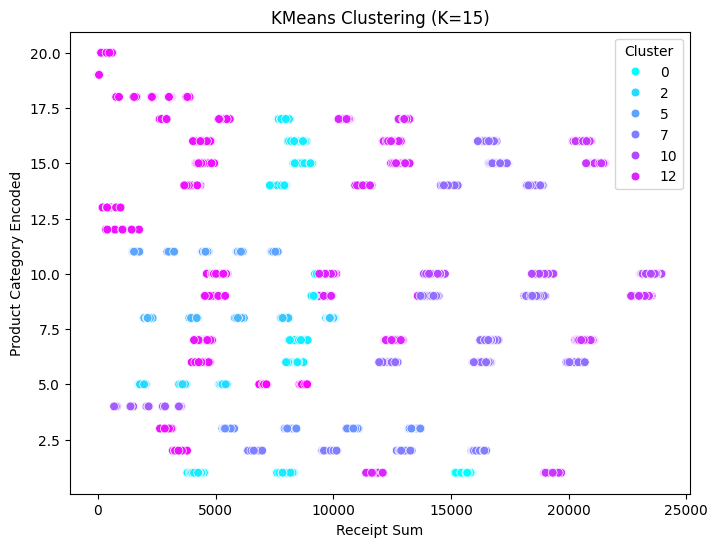

In [12]:
# Kmeans with Silhouette Score K=3

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


KmeansElbowDf = df[['ReceiptSum', 'ProductCategory']].copy() # copy to avoid changing data

KmeansElbowDf['Cluster'] = cluster_assignments_k14  # Add the cluster labels as a new column
#k10centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))


sns.scatterplot( x='ReceiptSum',  y='ProductCategory', hue='Cluster', data=KmeansElbowDf, palette='cool', s=40 )


plt.title("KMeans Clustering (K=15)")
plt.xlabel("Receipt Sum")
plt.ylabel("Product Category Encoded")


#plt.grid(True)# Add grid
plt.legend(title='Cluster')

plt.show()


# DB Scan V2

## Fine Tuning for eps and min_pts

In [22]:
import numpy as np
# Return the percentage of transactions that were assigned to a cluster (not labeled as noise)
# `cluster_labels` is the output of DBSCAN (list of cluster assignments)
def percentClustered(assignedClusters):
    Alltransactions = len(assignedClusters)
    clusteredTransactions = Alltransactions - list(assignedClusters).count(-1)
    return (clusteredTransactions / Alltransactions) * 100



# Return the number of unique clusters (excluding noise)
# `cluster_labels` is the output of DBSCAN
def clusterCount(uniqueClusters):
    clusterids = set(uniqueClusters)
    if -1 in clusterids:
        clusterids.remove(-1)  # Remove noise
    totaldistinctclusters = len(clusterids)
    return totaldistinctclusters

## The code is downsampled and split to reduce runtime

In [7]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03]
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]             # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(scaledData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            mask = assignedClusters != -1
            silScore = silhouette_score(scaledData[mask], assignedClusters[mask])

        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 92.55%
Number of transaction clusters found: 38


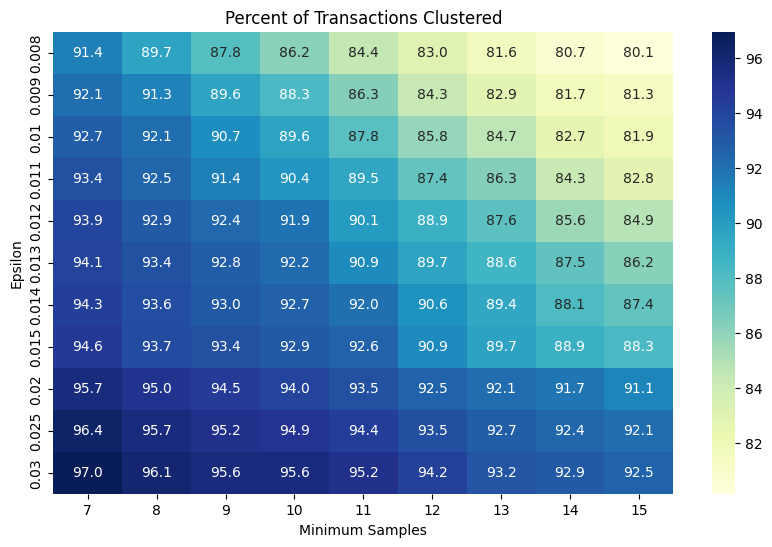

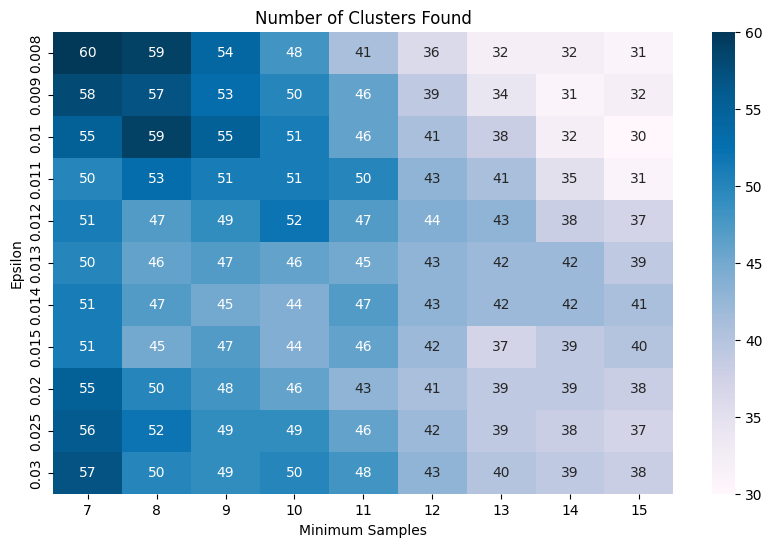

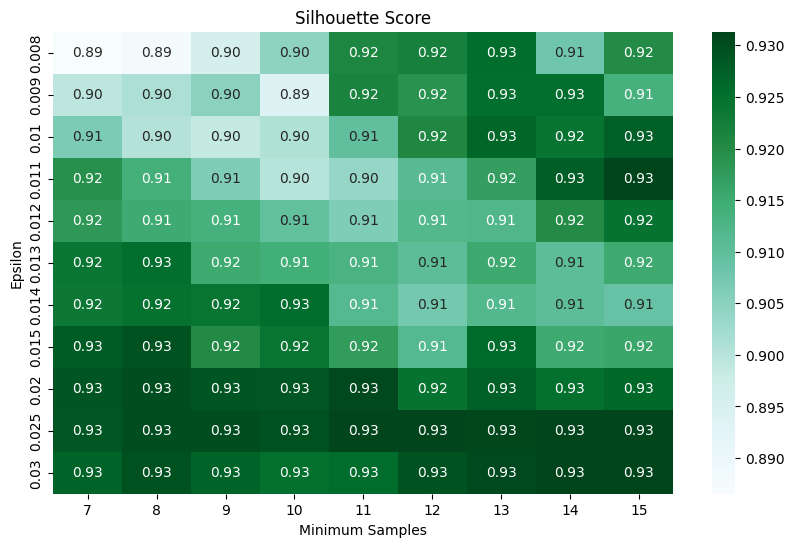

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [0.008, 0.009, 0.010, 0.011, 0.012, 0.013, 0.014, 0.015, 0.02, 0.025, 0.03]
min_samples_values = [7, 8, 9, 10, 11, 12, 13, 14, 15]           # x-axis (cols)
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()


In [9]:

##########################use this block most efficient order

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter grid to search

eps_values = [0.008, 0.009, 0.010, 0.011, 0.012,0.013, 0.014, 0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]                # x-axis (cols)

# Initialize result matrices for heatmaps
percent_clustered = np.zeros((len(eps_values), len(min_samples_values))) # percent of transactions clustered (reciept sum & target categor)
num_clusters = np.zeros((len(eps_values), len(min_samples_values))) # Number of transactions Clusters
silhouette_scores = np.zeros((len(eps_values), len(min_samples_values)))

# Loop through each eps and min_samples combination

for i, eps in enumerate(eps_values):
    for j, min_pts in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_pts)
        assignedClusters = db.fit_predict(scaledData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

        if numberOfClusters > 1:  # Also calculate Silh score for each implementation of DB Scan
            mask = assignedClusters != -1
            silScore = silhouette_score(scaledData[mask], assignedClusters[mask])

        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


# Final print (just for last config)
print("Percentage of transactions clustered: {:.2f}%".format(percentageClustered))
print("Number of transaction clusters found: {}".format(numberOfClusters))



Percentage of transactions clustered: 88.66%
Number of transaction clusters found: 31


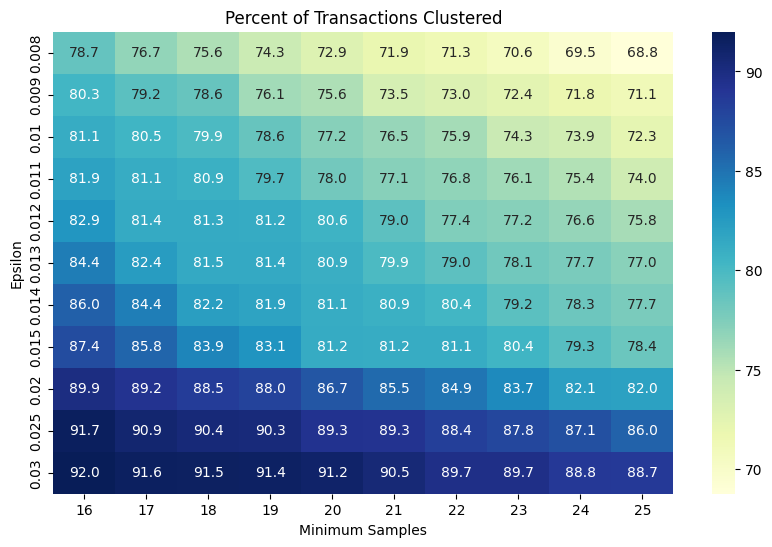

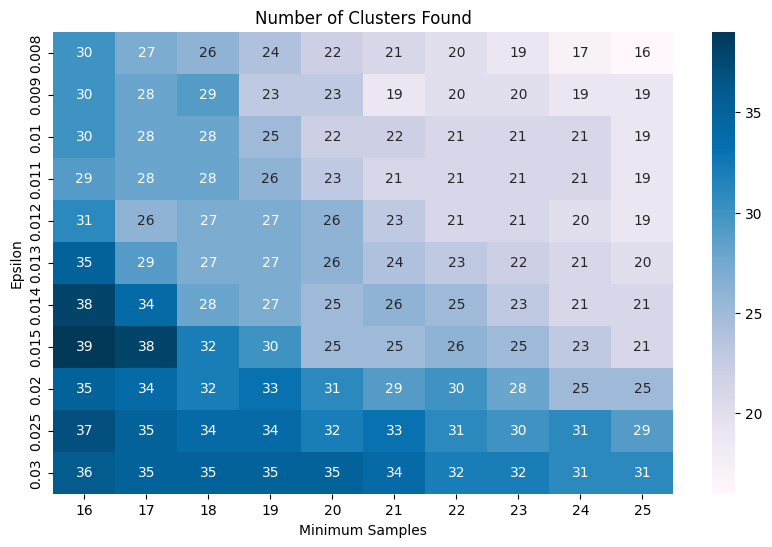

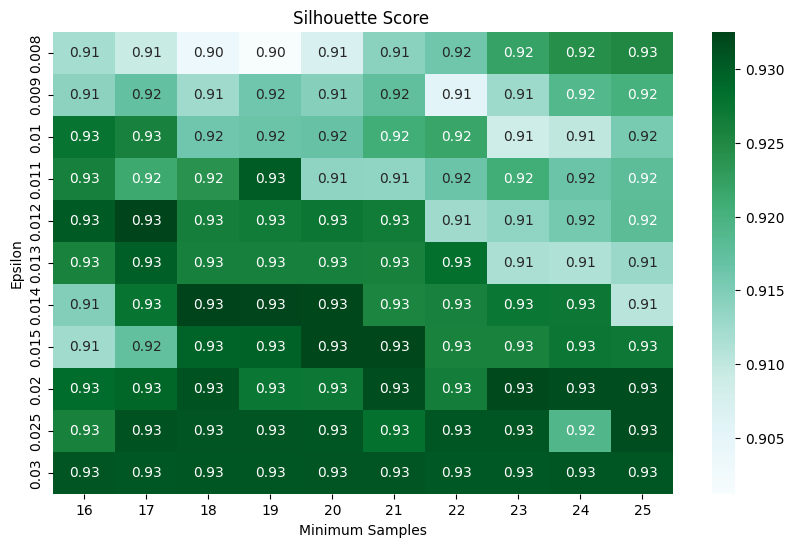

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define axis labels
eps_values = [0.008, 0.009, 0.010, 0.011, 0.012,0.013, 0.014, 0.015, 0.02, 0.025, 0.03]         # y-axis (rows)
min_samples_values = [16, 17, 18, 19, 20, 21, 22, 23, 24, 25]              # x-axis (cols)
# Percent clustered
plt.figure(figsize=(10, 6))
sns.heatmap(percent_clustered, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Number of clusters
plt.figure(figsize=(10, 6))
sns.heatmap(num_clusters, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()

# Silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(silhouette_scores, annot=True, xticklabels=min_samples_values, yticklabels=eps_values, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score ")
plt.xlabel("Minimum Samples")
plt.ylabel("Epsilon")
plt.show()


Testing Different Parameters for DB Scan

In [11]:
from sklearn.cluster import DBSCAN


# Set the params
eps = 0.015
min_samples = 15

#  DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
assignedClusters = db.fit_predict(scaledData)


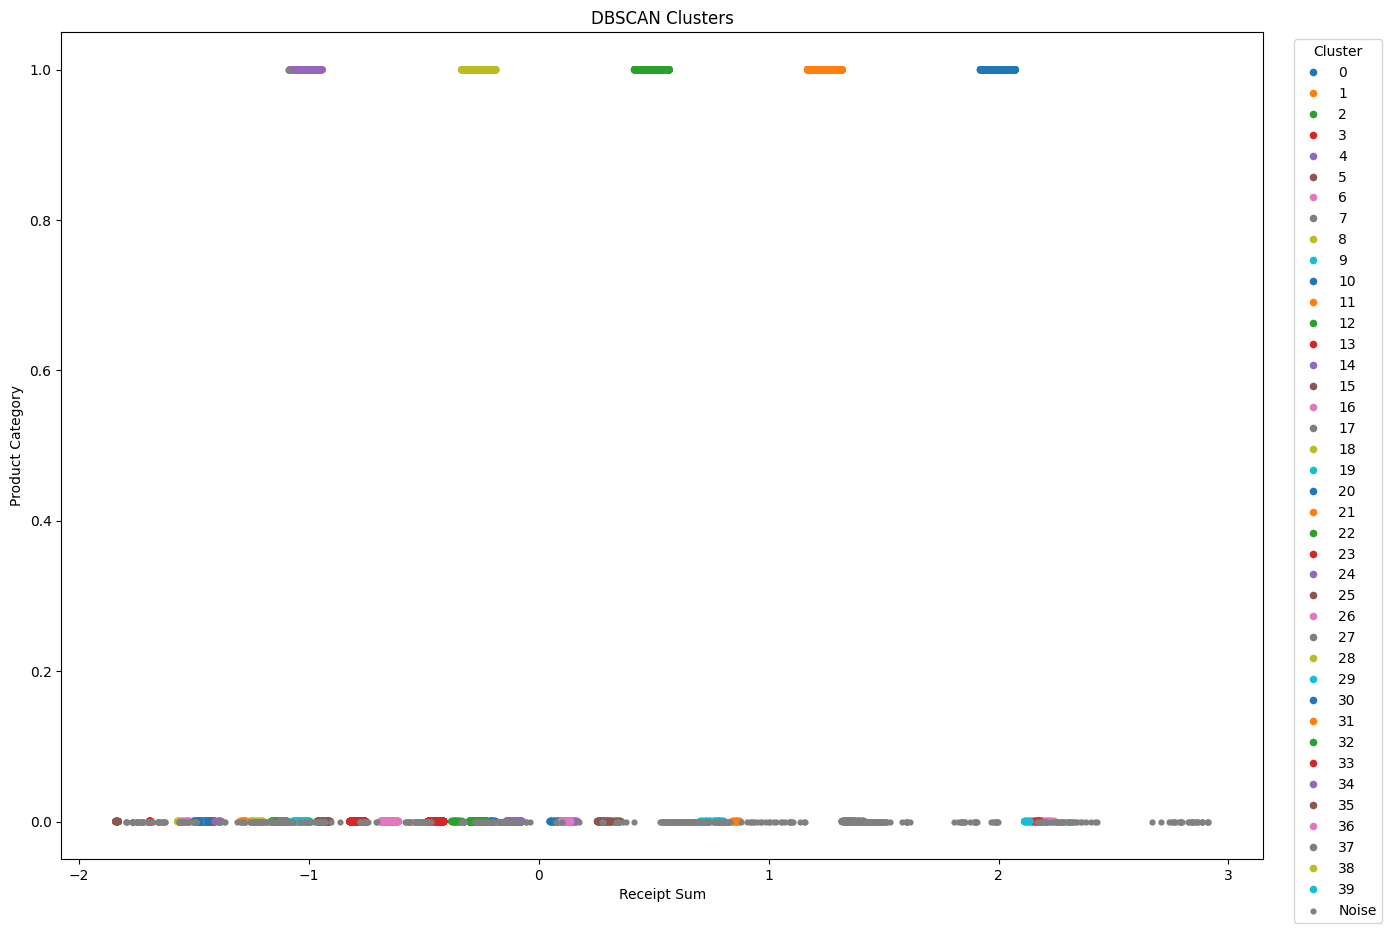

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = scaledData[:, 0]
Y = scaledData[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("DBSCAN Clusters")
plt.xlabel("Receipt Sum")
plt.ylabel("Product Category")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Final DB Scan

In [13]:
from sklearn.cluster import DBSCAN

# Set the params
eps = 0.011
min_samples = 20

#  DBSCAN
db = DBSCAN(eps=eps, min_samples=min_samples)
assignedClusters = db.fit_predict(scaledData)


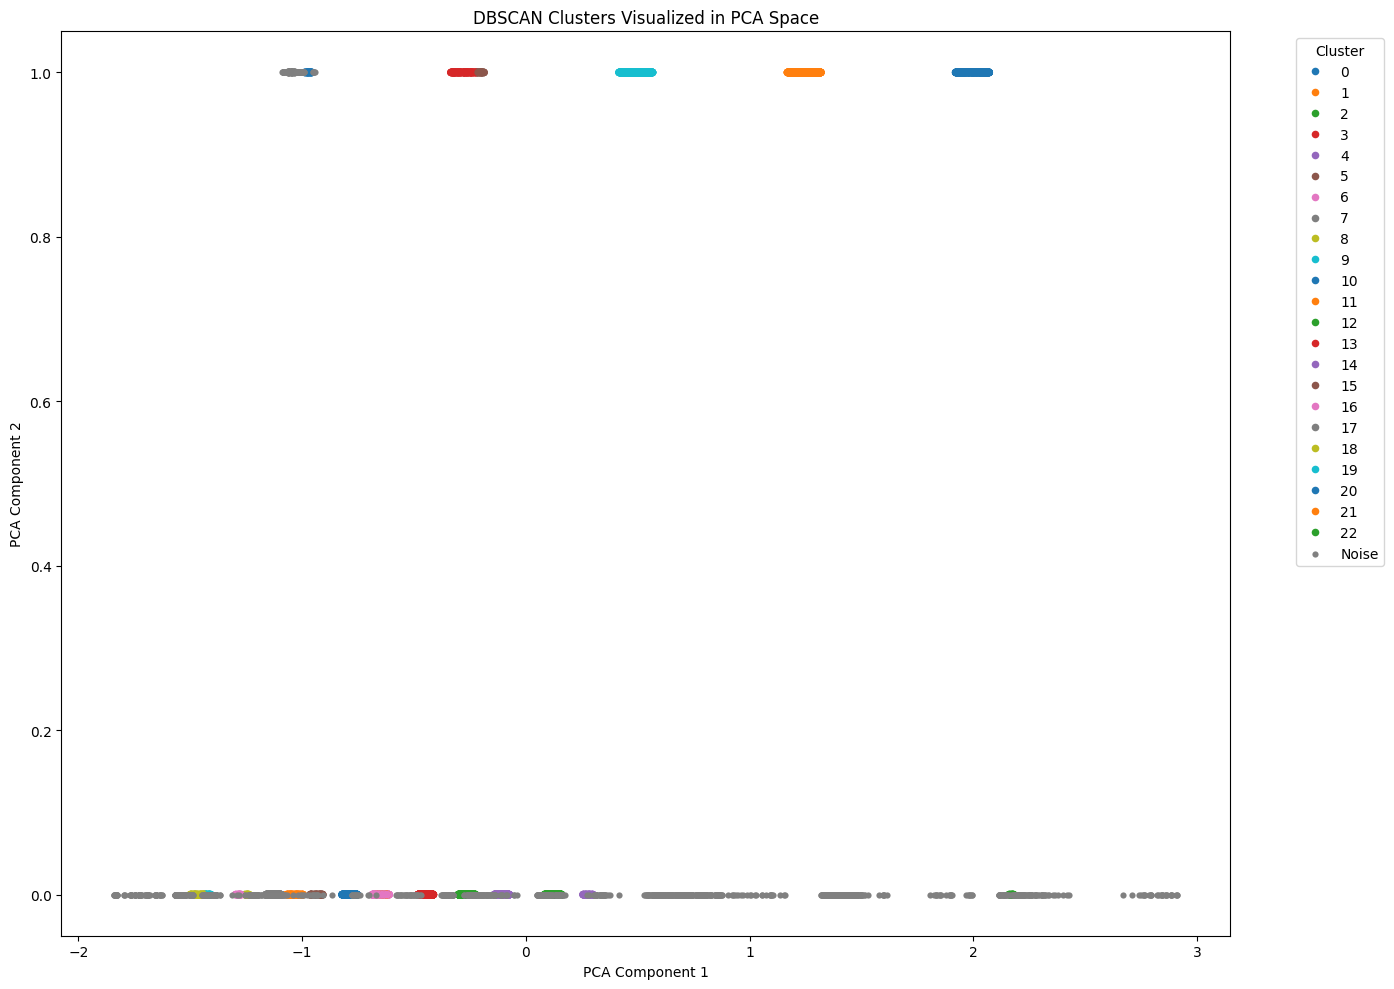

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = scaledData[:, 0]
Y = scaledData[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("DBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


#HDBScan


In [23]:
import warnings
warnings.filterwarnings('ignore')

from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


minpointpercluster = [10, 20, 30, 40, 50, 60]
noisethresholdabove = [10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170]

percent_clustered = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
num_clusters = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
silhouette_scores = np.zeros((len(minpointpercluster), len(noisethresholdabove)))

# Loop through each eps and min_samples combination

for i, min_cluster_size in enumerate(minpointpercluster):
    for j, min_pts in enumerate(noisethresholdabove):
        db = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_pts)
        assignedClusters = db.fit_predict(scaledData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

  # Also calculate Silh score for each implementation of DB Scan
        if numberOfClusters > 1:
            silScore = silhouette_score(scaledData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


print("Percent  clustered: {:.2f}%".format(percentageClustered))
print("Number of clusters found: {}".format(numberOfClusters))

Percent  clustered: 77.33%
Number of clusters found: 14


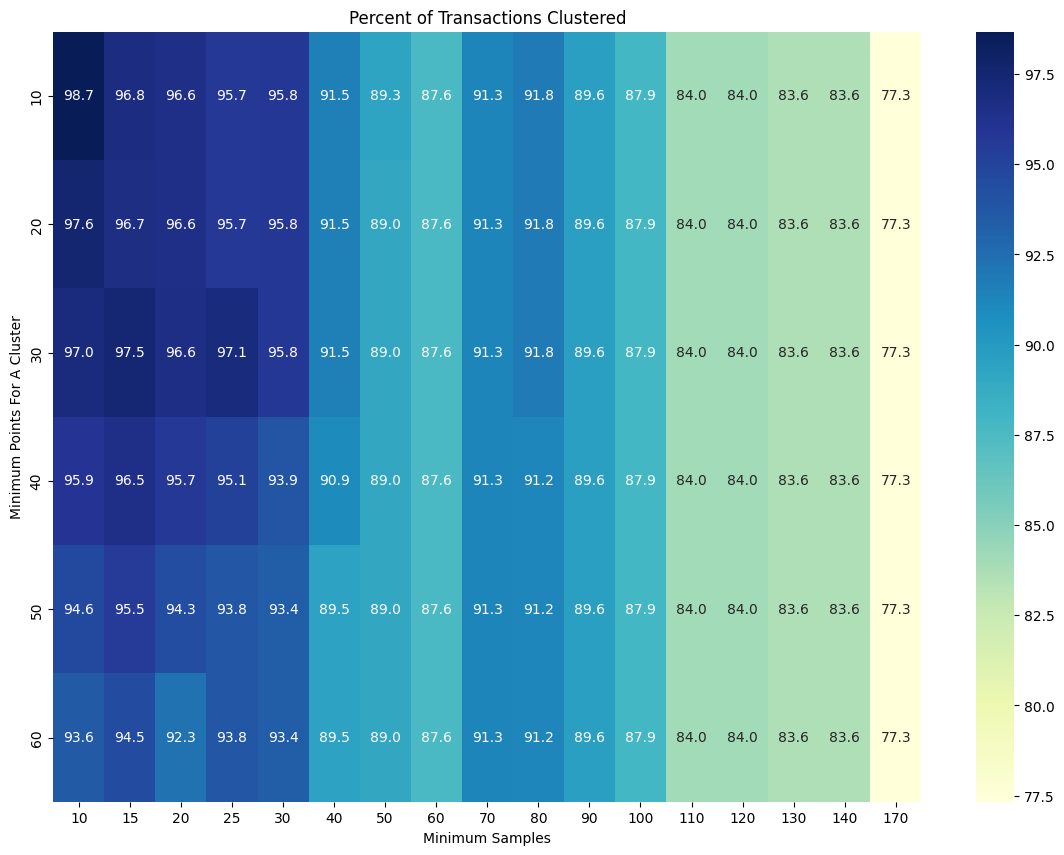

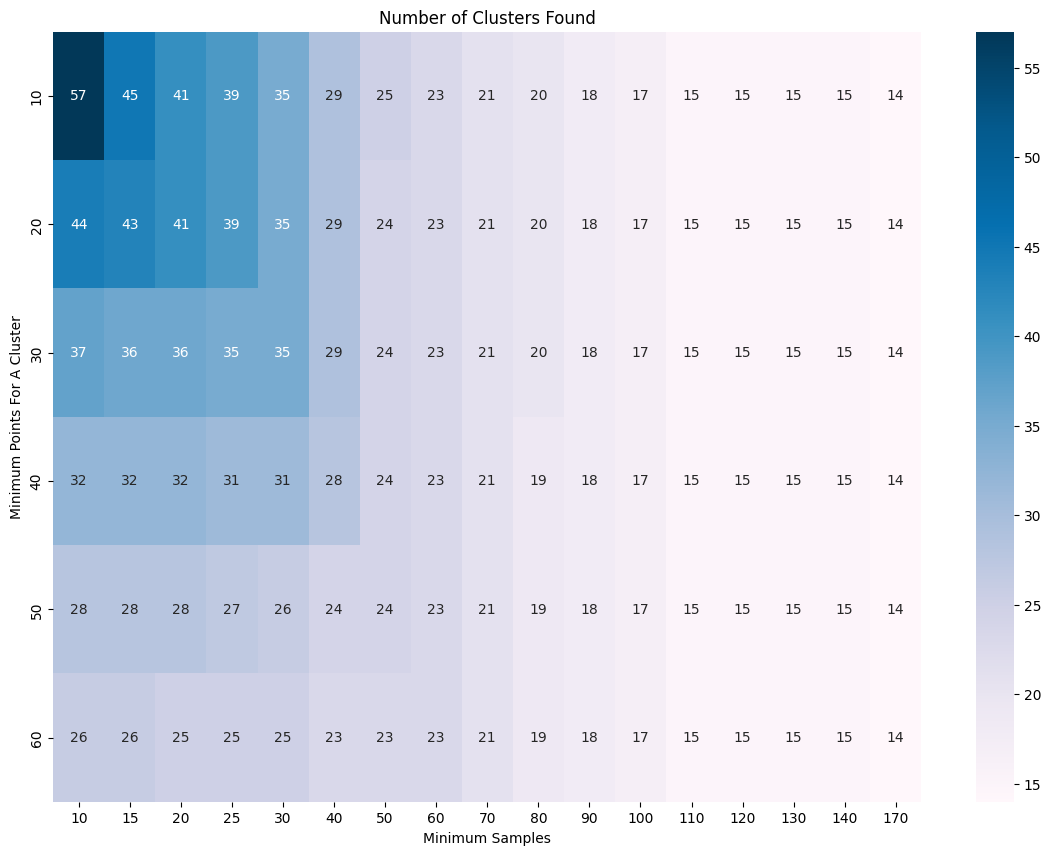

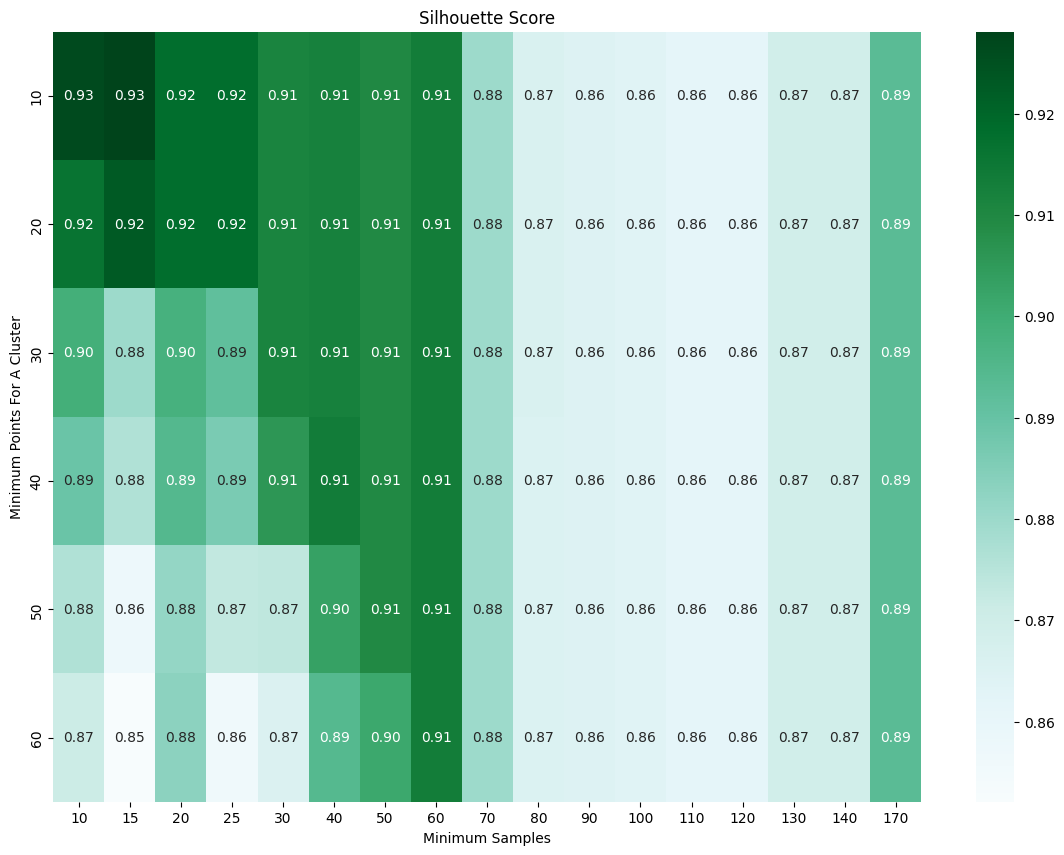

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
minpointpercluster = [10, 20, 30, 40, 50, 60]
noisethresholdabove = [10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170]

# Percent heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(percent_clustered, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

# Number clusters heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(num_clusters, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

# Silhouette scores
plt.figure(figsize=(14, 10))
sns.heatmap(silhouette_scores, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

Split to reduce runtime

In [25]:
import warnings
warnings.filterwarnings('ignore')

from hdbscan import HDBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


minpointpercluster = [100, 110, 120, 130, 140, 170, 200, 250, 270]
noisethresholdabove = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170, 200, 220]

percent_clustered = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
num_clusters = np.zeros((len(minpointpercluster), len(noisethresholdabove)))
silhouette_scores = np.zeros((len(minpointpercluster), len(noisethresholdabove)))

# Loop through each eps and min_samples combination

for i, min_cluster_size in enumerate(minpointpercluster):
    for j, min_pts in enumerate(noisethresholdabove):
        db = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_pts)
        assignedClusters = db.fit_predict(scaledData)

        percentageClustered = percentClustered(assignedClusters)
        numberOfClusters = clusterCount(assignedClusters)

  # Also calculate Silh score for each implementation of DB Scan
        if numberOfClusters > 1:
            silScore = silhouette_score(scaledData[assignedClusters != -1], assignedClusters[assignedClusters != -1])
        else:
            silScore = np.nan

        percent_clustered[i, j] = percentageClustered
        num_clusters[i, j] = numberOfClusters
        silhouette_scores[i, j] = silScore


print("Percent  clustered: {:.2f}%".format(percentageClustered))
print("Number of clusters found: {}".format(numberOfClusters))

Percent  clustered: 61.92%
Number of clusters found: 9


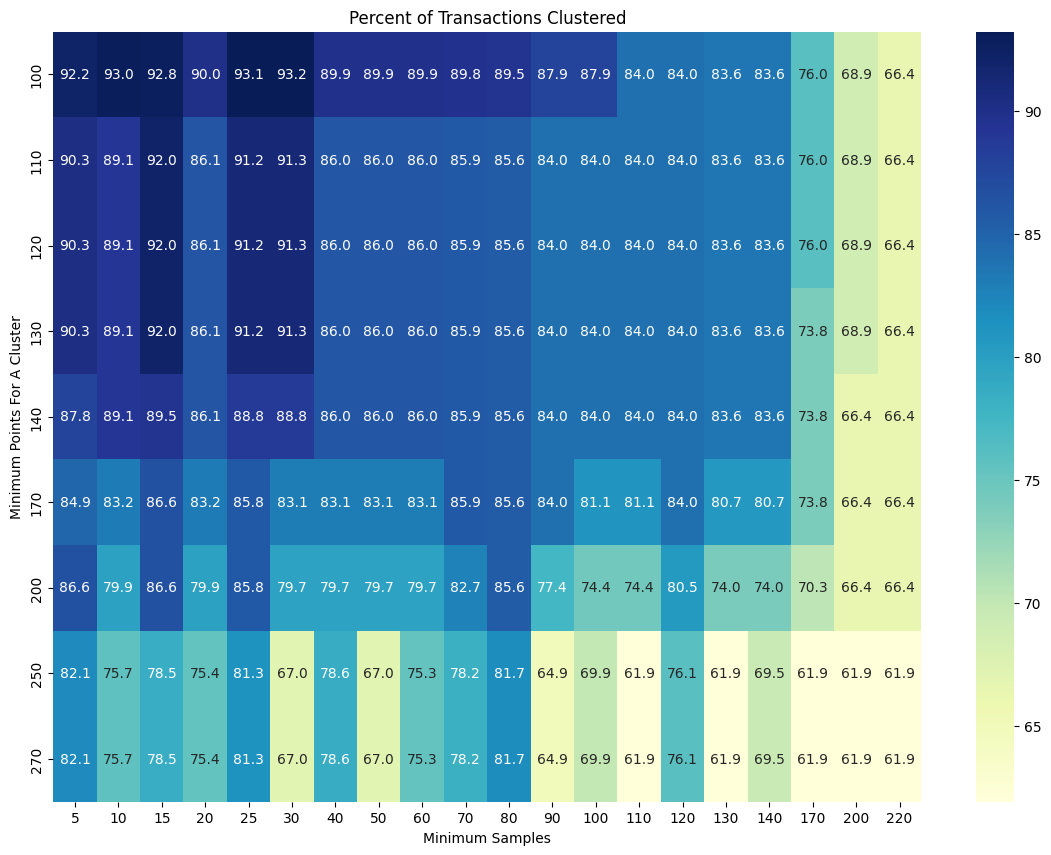

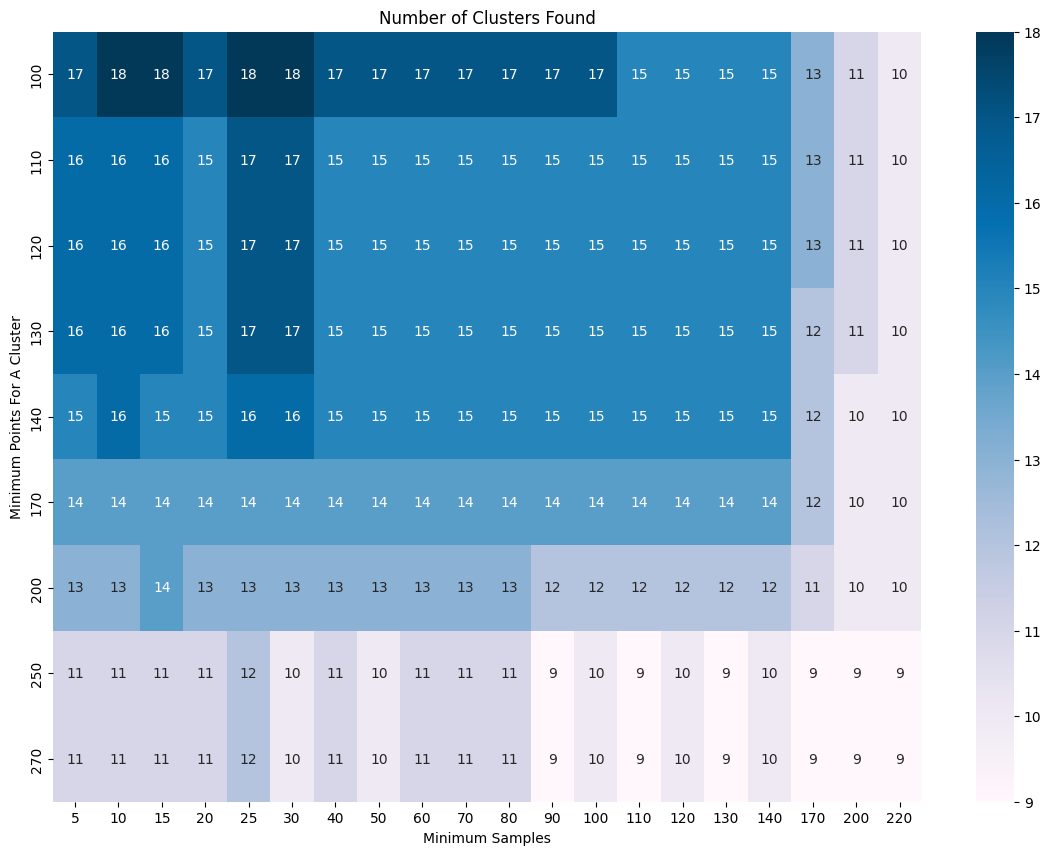

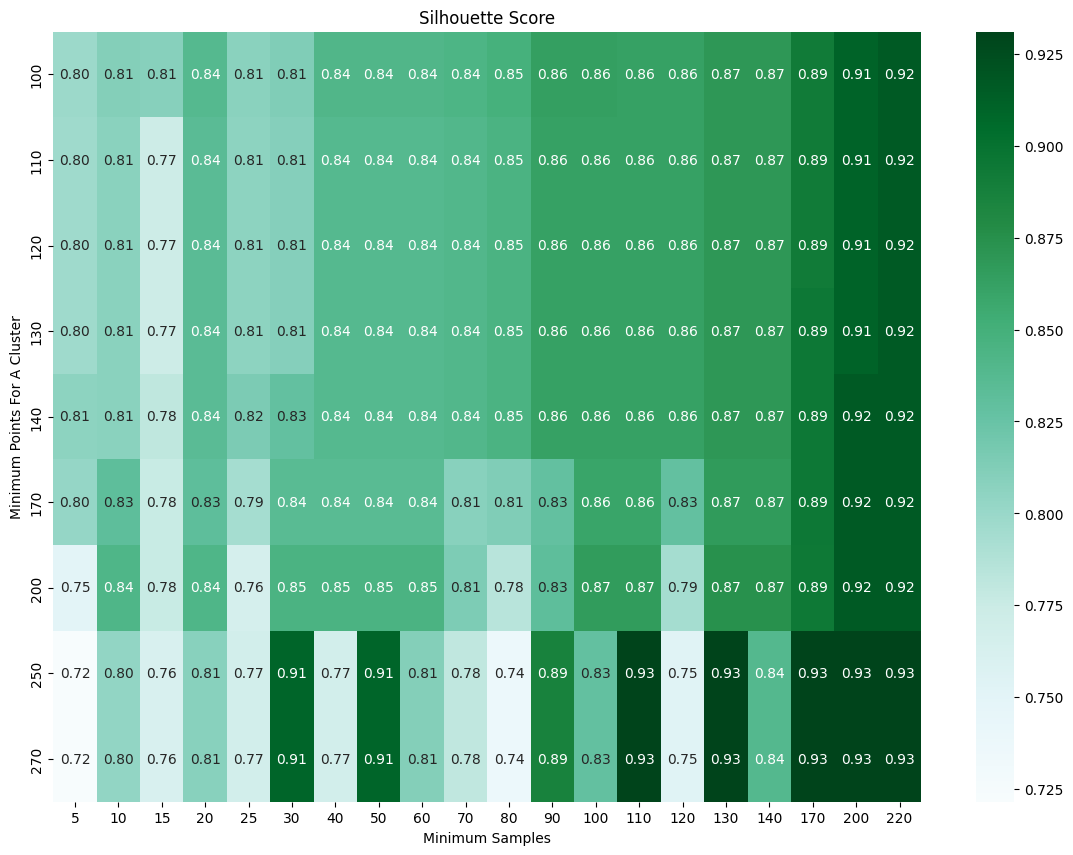

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns


minpointpercluster = [100, 110, 120, 130, 140, 170, 200, 250, 270]
noisethresholdabove = [5, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 170, 200, 220]

# Percent heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(percent_clustered, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="YlGnBu", fmt=".1f")
plt.title("Percent of Transactions Clustered")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

# Number clusters heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(num_clusters, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="PuBu", fmt=".0f")
plt.title("Number of Clusters Found")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

# Silhouette scores
plt.figure(figsize=(14, 10))
sns.heatmap(silhouette_scores, annot=True, xticklabels=noisethresholdabove, yticklabels=minpointpercluster, cmap="BuGn", fmt=".2f")
plt.title("Silhouette Score")
plt.xlabel("Minimum Samples")
plt.ylabel("Minimum Points For A Cluster")
plt.show()

In [27]:
from sklearn.cluster import HDBSCAN

# Set the params
eps = 0.008
min_samples = 14

#  HDBSCAN
hdb = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
assignedClusters = db.fit_predict(scaledData)


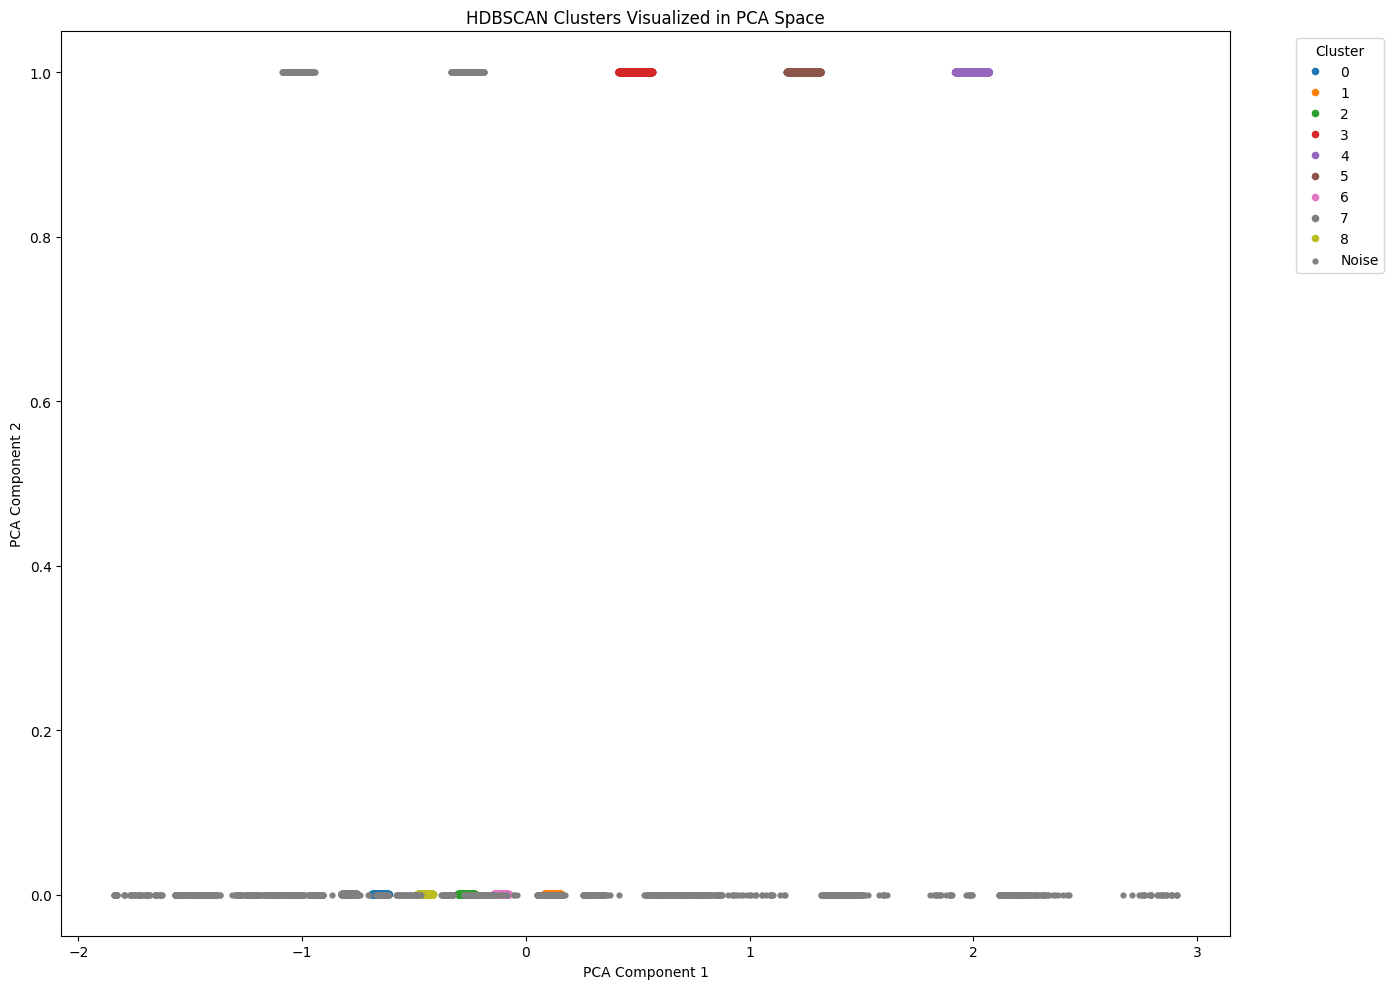

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# X, Y are PCA components
X = scaledData[:, 0]
Y = scaledData[:, 1]
cluster_ids = assignedClusters

# Prepare color mapping: core clusters + noise
core_mask = cluster_ids != -1
noise_mask = cluster_ids == -1

# Plot
plt.figure(figsize=(14, 10))
sns.scatterplot(x=X[core_mask], y=Y[core_mask], hue=cluster_ids[core_mask], palette="tab10", s=30, linewidth=0)
sns.scatterplot(x=X[noise_mask], y=Y[noise_mask], color="gray", s=20, label="Noise", linewidth=0)

plt.title("HDBSCAN Clusters Visualized in PCA Space")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
